# ***INSTALL DEPENDENCIES*** #

In [4]:
from IPython.display import Markdown, display


with open('../README.md', 'r', encoding='utf-8') as f:
    display(Markdown(f.read()))

# Deep Learning Examples with Keras

A collection of deep learning examples using Keras, covering neural networks, recommender systems, convolutions, and object detection. Based on the course **Advanced Machine Learning**, University of Debrecen.

## GitHub Repository (Standalone Version)

You can access the non-Colab version of the project directly on GitHub:

[github.com/KeremDUZENLI/python-keras-deep-learning](https://github.com/KeremDUZENLI/python-keras-deep-learning)

## Install

1. Download Python 3.6.8: [Python 3.6.8 Download](https://www.python.org/downloads/release/python-368/)
2. Check Python versions installed: `py -0`
3. Check the default version: `python --version`
4. Select Python 3.6.8: [Video Guide](https://www.youtube.com/watch?v=C5mn0WWKmGY&t=10s)

## Setup

1. Clone the repository:
   ```sh
   git clone https://github.com/KeremDUZENLI/python-keras-deep-learning.git
   ```
2. Create a virtual environment:
   ```sh
   python -m venv myEnv
   ```
3. Activate the virtual environment:
   - **Windows**: `myEnv\Scripts\activate`
   - **Linux/macOS**: `source myEnv/bin/activate`
4. Update pip:
   ```sh
   python -m pip install --upgrade pip
   ```
5. Update setuptools:
   ```sh
   pip install --upgrade setuptools
   ```
6. Install dependencies:
   ```sh
   pip install -r requirements.txt
   ```
7. Freeze dependencies (optional):
   ```sh
   python -m pip freeze > requirements.txt
   ```

## Notebooks

1. Install Jupyter:
   ```sh
   pip install jupyterlab
   ```
2. Launch Jupyter:
   ```sh
   jupyter lab
   ```

### Notebook Descriptions

- [1. Neural Networks](notebooks/1_neural_networks.ipynb) – Basics of neural networks with Keras.
- [2. Backpropagation](notebooks/2_backpropagation.ipynb) – Understanding the backpropagation algorithm and its implementation in Keras.
- [3. Neural Recommender](notebooks/3_neural_recommender.ipynb) – Building a simple recommender system using neural networks.
- [4. Convolutional Networks](notebooks/4_convolutional_network.ipynb) – Introduction to convolutional neural networks (CNNs) for image classification.
- [5. Fully Convolutional Networks](notebooks/5_full_convolutional_network.ipynb) – Implementing a full convolutional network for image segmentation tasks.
- [6. CNN Classification](notebooks/6_convolutional_network_classification.ipynb) – Classifying images using a convolutional neural network.
- [7. Text Classification & Seq2Seq Translation](notebooks/7_text_classification_seq2seq_translation.ipynb) – Text classification using RNNs and sequence-to-sequence models for language translation.
- [8. Variational Autoencoders](notebooks/8_variational_autoencoders.ipynb) – Implementing variational autoencoders for generative modeling.

## Acknowledgments

This project is based on the **Advanced Machine Learning** course at the **University of Debrecen**

- **Prof. Dr. András Hajdu** – Dean, Head of Department

  - _Department of Data Science and Visualization, Faculty of Informatics, University of Debrecen_
  - Email: [hajdu.andras@inf.unideb.hu](mailto:hajdu.andras@inf.unideb.hu)

- **Dr. Balázs Harangi** – Associate Professor, Deputy Head of Department

  - _Department of Data Science and Visualization, Faculty of Informatics, University of Debrecen_
  - Email: [harangi.balazs@inf.unideb.hu](mailto:harangi.balazs@inf.unideb.hu)

- **Kerem Düzenli** – PhD Candidate, University of Debrecen

  - _Creator and maintainer of this repository_
  - Email: [kerem.duzenli@inf.unideb.hu](mailto:kerem.duzenli@inf.unideb.hu)

## Contributing

1. Fork the repository.
2. Create a new branch:
   ```sh
   git checkout -b YourBranch
   ```
3. Make your changes and commit them:
   ```sh
   git commit -m "Add some feature"
   ```
4. Push to the branch:
   ```sh
   git push origin YourBranch
   ```
5. Open a pull request.

## License

This project is licensed under the **Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)** license. This means you are free to:

- **Share** – Copy and redistribute the material in any medium or format.
- **Adapt** – Remix, transform, and build upon the material.

However, **you may not use the material for commercial purposes**.

For details, see the [LICENSE](LICENSE) file or read more at [Creative Commons](https://creativecommons.org/licenses/by-nc/4.0/).

## Disclaimer

This repository is intended **only for educational and research purposes**. The authors and contributors assume no responsibility for misuse of the code or any implications arising from its use.

## Support My Work

If you find this resource valuable and would like to help support my education and doctoral research, please consider treating me to a cup of coffee (or tea) via Revolut.

<div align="center">
  <a href="https://revolut.me/krmdznl" target="_blank">
    <img src="https://img.shields.io/badge/Support%20My%20Projects-Donate%20via%20Revolut-orange?style=for-the-badge" alt="Support my education via Revolut" />
  </a>
</div> <br>


# Step 1: Loading and Exploring the Dataset

Dataset shape: (1797, 64)


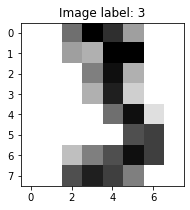

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


# Load the digits dataset
digits = load_digits()

# Print the shape of the data to understand its size
print("Dataset shape:", digits.data.shape)

# Display one sample image
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Image label: {digits.target[sample_index]}")
plt.show()

# Step 2: Preprocessing the Data

Training set shape: (1527, 64)
Test set shape: (270, 64)


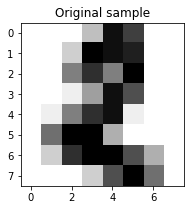

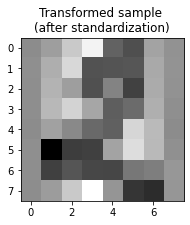

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


## Convert data to the right format
data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)

# Normalize the data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the new sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


## Visualizing Normalization
sample_index = 45

# Show the original sample
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Original sample")
plt.show()

# Show a transformed sample
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Transformed sample \n(after standardization)")
plt.show()

# Step 3: Preparing Labels for Classification

In [12]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical


# Look at original labels
print("Original labels:\n", y_train[:3])

# Convert to one-hot encoding
Y_train = to_categorical(y_train)
print("\nOne-hot encoded labels:\n", Y_train[:3])

Original labels:
 [2 9 5]

One-hot encoded labels:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


# Step 4: Building and Training the Neural Network

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers


## Define the model
N = X_train.shape[1]  # 64 (input features)
H = 100               # 100 neurons in hidden layer
K = 10                # 10 classes (output)

model = Sequential()
model.add(Dense(H, input_dim=N))    # Hidden layer
model.add(Activation("tanh"))       # Activation function
model.add(Dense(K))                 # Output layer
model.add(Activation("softmax"))    # Output activation

print("Neural Network is built")

Neural Network is built


## Step 4.1: Train the Model


Weights:
 [[-0.1433155  -0.15063956  0.15194307 ... -0.01502232 -0.02344881
  -0.13982613]
 [ 0.17570524  0.14402251 -0.0540604  ...  0.03787543  0.03638156
   0.18284826]
 [-0.08081064 -0.13100545 -0.1593975  ... -0.13613333 -0.05172347
   0.01762129]
 ...
 [ 0.07634543  0.09711815  0.10929398 ... -0.11425514  0.01676925
   0.00827613]
 [ 0.0607558  -0.14382502  0.17738877 ... -0.09028604  0.1364656
   0.18580662]
 [ 0.16194238 -0.09496988  0.08811907 ... -0.04298009 -0.01953635
  -0.10641506]]

Weights Standard Deviation:
 0.11052714

Biases:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Epoch 1/15
1527/1527 [==============================] - 0s 43us/step - loss: 0.8277 - accuracy: 0.7898
Epoch 2/15
1527/1527 [================

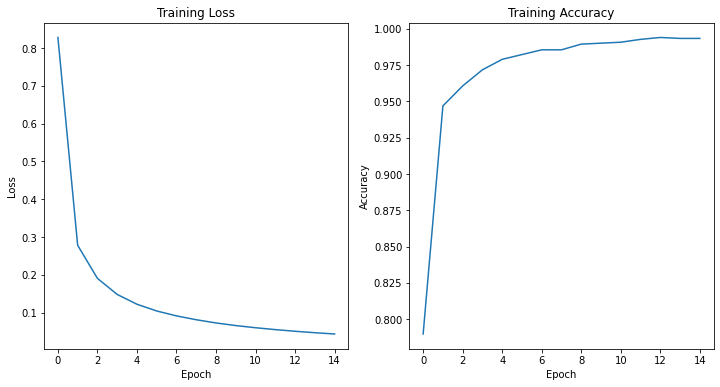

270/270 [==============================] - 0s 82us/step
Test Loss: 0.0987
Test Accuracy: 0.9741


In [14]:
## Compile the Model
model.compile(optimizer=optimizers.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Weights and Biases
weights = model.layers[0].weights[0].eval(keras.backend.get_session())
print("\nWeights:\n", weights)
print("\nWeights Standard Deviation:\n", weights.std())
biases = model.layers[0].weights[1].eval(keras.backend.get_session())
print("\nBiases:\n", biases)

# Train the model
history = model.fit(X_train, Y_train, epochs=15, batch_size=32)

# Show model summary
model.summary()


## Visualizing Training Progress
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


## Ensure one-hot encoding for labels
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

## Step 4.2: Train the Model (lr=0.1 --> lr=0.001)

Epoch 1/15
1527/1527 [==============================] - 0s 38us/step - loss: 0.0397 - accuracy: 0.9961
Epoch 2/15
1527/1527 [==============================] - 0s 18us/step - loss: 0.0397 - accuracy: 0.9961
Epoch 3/15
1527/1527 [==============================] - 0s 17us/step - loss: 0.0397 - accuracy: 0.9961
Epoch 4/15
1527/1527 [==============================] - 0s 17us/step - loss: 0.0397 - accuracy: 0.9961
Epoch 5/15
1527/1527 [==============================] - 0s 17us/step - loss: 0.0396 - accuracy: 0.9961
Epoch 6/15
1527/1527 [==============================] - 0s 16us/step - loss: 0.0396 - accuracy: 0.9961
Epoch 7/15
1527/1527 [==============================] - 0s 16us/step - loss: 0.0396 - accuracy: 0.9961
Epoch 8/15
1527/1527 [==============================] - 0s 16us/step - loss: 0.0395 - accuracy: 0.9961
Epoch 9/15
1527/1527 [==============================] - 0s 15us/step - loss: 0.0395 - accuracy: 0.9961
Epoch 10/15
1527/1527 [==============================] - 0s 17us/step - l

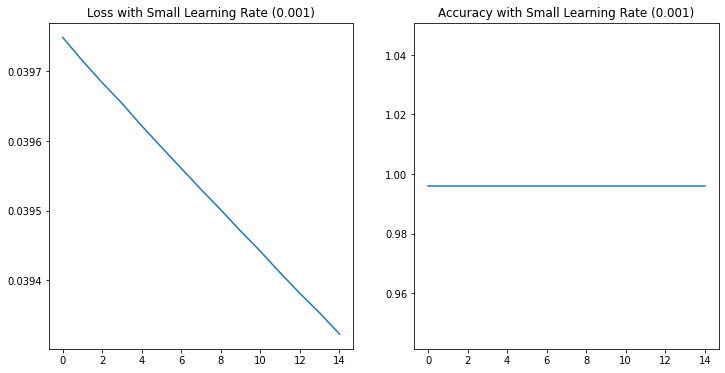

270/270 [==============================] - 0s 85us/step
Test Loss: 0.0984
Test Accuracy: 0.9741


In [15]:
## Compile the model
model.compile(optimizer=optimizers.SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_slow = model.fit(X_train, Y_train, epochs=15, batch_size=32)

# Visualizing Training Progress
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history_slow.history['loss'])
plt.title('Loss with Small Learning Rate (0.001)')

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_slow.history['accuracy'])
plt.title('Accuracy with Small Learning Rate (0.001)')
plt.show()


## Ensure one-hot encoding for labels
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 5: Building and Training the Neural Network (normal initialization)

In [16]:
from keras import initializers


## Define the model with normal initialization
normal_init = initializers.RandomNormal(stddev=0.01)

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=normal_init))    # Hidden layer
model.add(Activation("tanh"))                                       # Activation function
model.add(Dense(K, kernel_initializer=normal_init))                 # Output layer
model.add(Activation("softmax"))                                    # Output activation

print("Neural Network is built with normal initialization")

Neural Network is built with normal initialization


## Step 5.1: Train the Model

Epoch 1/15
1527/1527 [==============================] - 0s 40us/step - loss: 1.8373 - accuracy: 0.6817
Epoch 2/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.7024 - accuracy: 0.8330
Epoch 3/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.3517 - accuracy: 0.9286
Epoch 4/15
1527/1527 [==============================] - 0s 26us/step - loss: 0.2318 - accuracy: 0.9528
Epoch 5/15
1527/1527 [==============================] - 0s 18us/step - loss: 0.1768 - accuracy: 0.9601
Epoch 6/15
1527/1527 [==============================] - 0s 16us/step - loss: 0.1460 - accuracy: 0.9731
Epoch 7/15
1527/1527 [==============================] - 0s 17us/step - loss: 0.1254 - accuracy: 0.9758
Epoch 8/15
1527/1527 [==============================] - 0s 16us/step - loss: 0.1107 - accuracy: 0.9784
Epoch 9/15
1527/1527 [==============================] - 0s 16us/step - loss: 0.0999 - accuracy: 0.9797
Epoch 10/15
1527/1527 [==============================] - 0s 16us/step - l

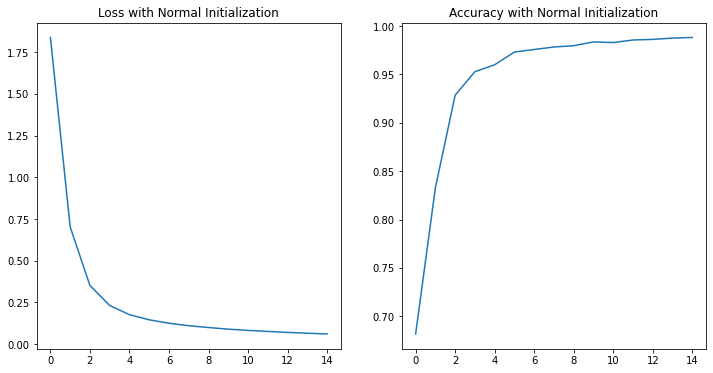

270/270 [==============================] - 0s 93us/step
Test Loss: 0.1022
Test Accuracy: 0.9667


In [19]:
## Compile the model
model.compile(optimizer=optimizers.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_init = model.fit(X_train, Y_train, epochs=15, batch_size=32)


## Visualizing Training Progress
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history_init.history['loss'])
plt.title('Loss with Normal Initialization')

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_init.history['accuracy'])
plt.title('Accuracy with Normal Initialization')
plt.show()


## Ensure one-hot encoding for labels
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 6: Building and Training the Neural Network (more layers or neurons (H --> 200))

In [20]:
from keras import initializers


# Use normal initialization
normal_init = initializers.RandomNormal(stddev=0.01)

model = Sequential()
model.add(Dense(200, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

print("Neural Network is built with more layers or neurons")

Neural Network is built with more layers or neurons


## Step 6.1: Train the Model (different optimizer (SGD --> optimizers.Adam))

Epoch 1/15
1527/1527 [==============================] - 0s 59us/step - loss: 1.5776 - accuracy: 0.7577
Epoch 2/15
1527/1527 [==============================] - 0s 21us/step - loss: 0.5054 - accuracy: 0.8854
Epoch 3/15
1527/1527 [==============================] - 0s 19us/step - loss: 0.2480 - accuracy: 0.9463
Epoch 4/15
1527/1527 [==============================] - 0s 18us/step - loss: 0.1701 - accuracy: 0.9659
Epoch 5/15
1527/1527 [==============================] - 0s 18us/step - loss: 0.1263 - accuracy: 0.9771
Epoch 6/15
1527/1527 [==============================] - 0s 18us/step - loss: 0.1044 - accuracy: 0.9771
Epoch 7/15
1527/1527 [==============================] - 0s 20us/step - loss: 0.0869 - accuracy: 0.9817
Epoch 8/15
1527/1527 [==============================] - 0s 18us/step - loss: 0.0748 - accuracy: 0.9862
Epoch 9/15
1527/1527 [==============================] - 0s 18us/step - loss: 0.0637 - accuracy: 0.9889
Epoch 10/15
1527/1527 [==============================] - 0s 16us/step - l

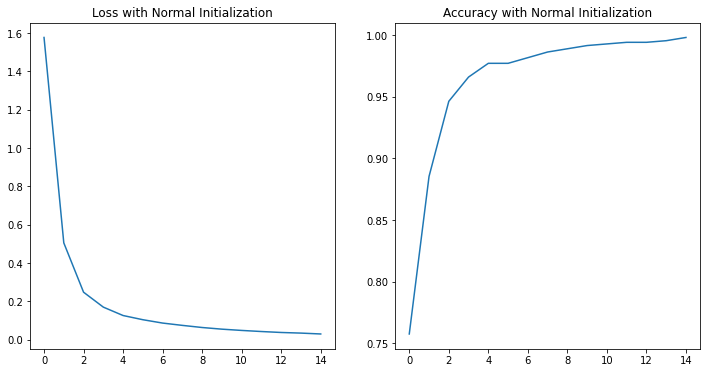

270/270 [==============================] - 0s 102us/step
Test Loss: 0.0782
Test Accuracy: 0.9704


In [21]:
## Compile the model
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_init = model.fit(X_train, Y_train, epochs=15, batch_size=32)


## Visualizing Training Progress
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history_init.history['loss'])
plt.title('Loss with Normal Initialization')

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_init.history['accuracy'])
plt.title('Accuracy with Normal Initialization')
plt.show()


## Ensure one-hot encoding for labels
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")